# Lung Cancer Survival Period Prediction: Regression

Starting with importing the datset from a.csv file and replacing entries with codes representing missing values. We aslo drop any rows with missing values in either Diagnosis year (YEAR_DX) or Survival Time in Months (SRV_TIME_MON) as these values directly affect the target variable and hence, removed from model training.

In [1]:
import pandas as pd

lung_cancer=pd.read_csv('final_respiratory_cancer.csv',index_col=0)

lung_cancer.replace(to_replace={'MAR_STAT':9,'RACE1V':99,'AGE_DX':999,'SEQ_NUM':99,
                                  'Lateral':9,'GRADE':9,'DX_CONF':9,'CSEXTEN':999,
                                  'CSLYMPHN':999,'DAJCCT':88,'DAJCCN':88,'DAJCCM':88,
                                  'SURGSCOF':9,'SURGSITF':9,'NO_SURG':9,'AGE_1REC':99,
                                  'RAC_RECA':9,'RAC_RECY':9,'HST_STGA':9,'INTPRIM':9,
                                  'ERSTATUS':9,'PRSTATUS':9,'SRV_TIME_MON':9999,'SRV_TIME_MON_FLAG':9,
                                  'HER2':9,'BRST_SUB':9,'MALIGCOUNT':99,'BENBORDCOUNT':99,
                                  'RAD_SURG':9},value=pd.np.nan,inplace=True)

lung_cancer.replace({'EOD10_PN':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'EOD10_NE':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'CSTUMSIZ':{990:0,991:10,992:20,993:30,994:40,995:50,996:pd.np.nan,997:pd.np.nan,998:pd.np.nan,
                                   999:pd.np.nan,888:pd.np.nan},
                       'DAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan},
                       'DSS1977S':{8:pd.np.nan,9:pd.np.nan},'SURGPRIF':{90:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'ADJTM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJNM_6VALUE':{88:pd.np.nan,99:pd.np.nan},
                       'ADJM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan}
                       },inplace=True)

lung_cancer.dropna(axis=0,how='any',subset=['YEAR_DX','SRV_TIME_MON'],inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lung_cancer.head(3))

C:\Users\dshre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (134,135,136,137,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.

           REG  MAR_STAT  RACE1V  NHIADE  SEX  AGE_DX  YR_BRTH  SEQ_NUM  \
PUBCSNUM                                                                  
5100065   1502       2.0     1.0     NaN    2    82.0   1923.0      2.0   
5100081   1502       5.0     1.0     NaN    1    83.0   1925.0      2.0   
5100159   1502       2.0     1.0     NaN    2    73.0   1941.0      3.0   

          MDXRECMP  YEAR_DX PRIMSITE  LATERAL  HISTO2V  BEHO2V  HISTO3V  \
PUBCSNUM                                                                  
5100065          3     2006     C341        1     8041       3     8041   
5100081          8     2008     C341        1     8010       3     8046   
5100159          8     2015     C343        1     8550       3     8550   

          BEHO3V  GRADE  DX_CONF  REPT_SRC  EOD10_SZ  EOD10_EX  EOD10_PE  \
PUBCSNUM                                                                   
5100065        3    3.0      1.0         1       NaN       NaN       NaN   
5100081        3    

We are looking for % Missing in each column of the dataset. Those columns with more than 20% missing, are measured across different timeperiods or not realted measurements to this type of cancer. Hence, they are removed.

In [2]:
columns=lung_cancer.isna().sum(axis=0)/len(lung_cancer)

columns_list=list(columns[columns<0.2].index)

lung_cancer=lung_cancer.filter(items=columns_list,axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print('% Missing in each column')
    print(columns)

% Missing in each column
REG                  0.000000
MAR_STAT             0.044809
RACE1V               0.001196
NHIADE               1.000000
SEX                  0.000000
AGE_DX               0.000014
YR_BRTH              0.000014
SEQ_NUM              0.000024
MDXRECMP             0.000000
YEAR_DX              0.000000
PRIMSITE             0.000000
LATERAL              0.000000
HISTO2V              0.000000
BEHO2V               0.000000
HISTO3V              0.000000
BEHO3V               0.000000
GRADE                0.524347
DX_CONF              0.017255
REPT_SRC             0.000000
EOD10_SZ             1.000000
EOD10_EX             1.000000
EOD10_PE             1.000000
EOD10_ND             1.000000
EOD10_PN             0.788217
EOD10_NE             0.111849
EOD13                1.000000
EOD2                 1.000000
EOD4                 1.000000
EOD_CODE             1.000000
TUMOR_1V             1.000000
TUMOR_2V             1.000000
TUMOR_3V             1.000000
CSTUMSIZ       

Now, we are treating all the other columns for their missing values. For the categorical variables, the missing values are filled with the mode while the median is used for Quantitative Variables. The columns which directly affect the target variable or are irrelevant to this type of cancer from domain knowledge are removed.

In [3]:
stats=lung_cancer.describe().loc['50%']
catg=lung_cancer.mode()

drop_cols=['MDXRECMP','YEAR_DX','CSVFIRST','CSVLATES','CSVCURRENT','ICCC3WHO',
           'ICCC3XWHO','CODPUB','CODPUBKM','STAT_REC','IHSLINK','VSRTSADX','ODTHCLASS',
           'CSTSEVAL','CSRGEVAL','CSMTEVAL','ST_CNTY','SRV_TIME_MON','SRV_TIME_MON_FLAG',
           '1year_survival','5year_survival']
catg_cols=['REG','MAR_STAT','RACE1V','SEX','PRIMSITE','LATERAL','BEHO2V', 'BEHO3V',
           'DX_CONF','REPT_SRC','CSMETSDX','DAJCCT','DAJCCN','DAJCCM','DAJCCSTG','DSS1977S',
           'SCSSM2KO','SURGPRIF','SURGSCOF','SURGSITF','NO_SURG','TYPE_FU','AGE_1REC','SITERWHO',
           'ICDOTO9V','ICDOT10V','BEHTREND','HISTREC','HISTRECB','CS0204SCHEMA','RAC_RECA',
           'RAC_RECY','ORIGRECB','HST_STGA','FIRSTPRM','SUMM2K','AYASITERWHO','LYMSUBRWHO',
           'INTPRIM','CSSCHEMA','ANNARBOR','RADIATNR','RAD_SURG','CHEMO_RX_REC']
num_cols=['AGE_DX','YR_BRTH','SEQ_NUM','EOD10_NE','CSEXTEN','CSLYMPHN','HISTO2V',
          'HISTO3V','CS1SITE','CS25SITE','REC_NO','MALIGCOUNT','BENBORDCOUNT']

values=dict()
for i in catg_cols:
    values[i]=catg[i][0]
for i in num_cols:
    values[i]=stats[i]

lung_cancer.fillna(value=values,inplace=True)

print(values)

{'REG': 1541, 'MAR_STAT': 2.0, 'RACE1V': 1.0, 'SEX': 1, 'PRIMSITE': 'C341', 'LATERAL': 1, 'BEHO2V': 3, 'BEHO3V': 3, 'DX_CONF': 1.0, 'REPT_SRC': 1, 'CSMETSDX': 0.0, 'DAJCCT': 40.0, 'DAJCCN': 0.0, 'DAJCCM': 0.0, 'DAJCCSTG': 70.0, 'DSS1977S': 7.0, 'SCSSM2KO': 7, 'SURGPRIF': 0.0, 'SURGSCOF': 0.0, 'SURGSITF': 0.0, 'NO_SURG': 1.0, 'TYPE_FU': 2, 'AGE_1REC': 15.0, 'SITERWHO': 22030, 'ICDOTO9V': 1623, 'ICDOT10V': 'C341', 'BEHTREND': 3, 'HISTREC': 5, 'HISTRECB': 98, 'CS0204SCHEMA': 63, 'RAC_RECA': 1.0, 'RAC_RECY': 1.0, 'ORIGRECB': 0, 'HST_STGA': 4.0, 'FIRSTPRM': 1, 'SUMM2K': 7.0, 'AYASITERWHO': 35, 'LYMSUBRWHO': 99.0, 'INTPRIM': 1.0, 'CSSCHEMA': 47, 'ANNARBOR': 8, 'RADIATNR': 0, 'RAD_SURG': 0.0, 'CHEMO_RX_REC': 0, 'AGE_DX': 70.0, 'YR_BRTH': 1940.0, 'SEQ_NUM': 0.0, 'EOD10_NE': 0.0, 'CSEXTEN': 300.0, 'CSLYMPHN': 100.0, 'HISTO2V': 8070.0, 'HISTO3V': 8070.0, 'CS1SITE': 40.0, 'CS25SITE': 988.0, 'REC_NO': 1.0, 'MALIGCOUNT': 1.0, 'BENBORDCOUNT': 0.0}


Importing all the required packages

In [4]:
from numpy.random import seed
from tensorflow import set_random_seed

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Conv1D,Flatten
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from keras import backend
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Seperating our dataset into Predictors(data) set and Target Variable and getting dummy variables for all the categorical variables identified before. This inflates our dataset significantly as seen with the shape below.

In [5]:
data=lung_cancer.drop(columns=drop_cols)
target=pd.DataFrame(lung_cancer['SRV_TIME_MON'])
data=pd.get_dummies(data,prefix=catg_cols,columns=catg_cols,drop_first=False)

print(data.shape)

(702411, 524)


Normalizing both the Predictors and Target using a MinMaxScaler. Normalization is required to help with faster and more accurate training of Neural Networks. As Target variable is normalized too, the Root Mean Square Error can be read as a percentage.

In [6]:
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()

data_scaled=pd.DataFrame(scaler1.fit_transform(data),index=data.index,columns=data.columns)
target_scaled=pd.DataFrame(scaler2.fit_transform(target),index=target.index,columns=target.columns)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_scaled.head(2))
    print(target_scaled.head(2))

            AGE_DX   YR_BRTH  SEQ_NUM   HISTO2V   HISTO3V  EOD10_NE   CSEXTEN  \
PUBCSNUM                                                                        
5100065   0.725664  0.218487      0.1  0.025933  0.025933       0.0  0.214286   
5100081   0.734513  0.235294      0.1  0.006325  0.029096       0.0  0.612245   

          CSLYMPHN   CS1SITE  CS25SITE  REC_NO  MALIGCOUNT  BENBORDCOUNT  \
PUBCSNUM                                                                   
5100065       0.75  1.000000       0.0     0.0    0.052632           0.0   
5100081       0.25  0.988989       0.0     0.0    0.052632           0.0   

          REG_1501  REG_1502  REG_1520  REG_1521  REG_1522  REG_1523  \
PUBCSNUM                                                               
5100065        0.0       1.0       0.0       0.0       0.0       0.0   
5100081        0.0       1.0       0.0       0.0       0.0       0.0   

          REG_1525  REG_1526  REG_1527  REG_1529  REG_1531  REG_1535  \
PUBCSNUM 

Defining Custom Functions for RMSE and R-Square values as they are not defined in Keras.metrics

In [7]:
def rmse(y_true,y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def r_sq(y_true, y_pred):
    SS_res =  backend.sum(backend.square( y_true-y_pred )) 
    SS_tot = backend.sum(backend.square( y_true - backend.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + backend.epsilon()) )

## ANN Model 

A function to define the structure of the ANN with 4 hidden layers with [200,100,60,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [8]:
def build_model_ann():
    model=Sequential()
    
    model.add(Dense(200, input_dim=data.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [9]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=50, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 561928 samples, validate on 140483 samples
Epoch 1/50
561928/561928 [==============================] - 96s 170us/step - loss: 0.0202 - mean_squared_error: 0.0202 - rmse: 0.1414 - r_sq: 0.4460 - val_loss: 0.0194 - val_mean_squared_error: 0.0194 - val_rmse: 0.1388 - val_r_sq: 0.4699
Epoch 2/50
561928/561928 [==============================] - 54s 96us/step - loss: 0.0191 - mean_squared_error: 0.0191 - rmse: 0.1377 - r_sq: 0.4752 - val_loss: 0.0192 - val_mean_squared_error: 0.0192 - val_rmse: 0.1379 - val_r_sq: 0.4778
Epoch 3/50
561928/561928 [==============================] - 60s 107us/step - loss: 0.0188 - mean_squared_error: 0.0188 - rmse: 0.1367 - r_sq: 0.4822 - val_loss: 0.0192 - val_mean_squared_error: 0.0192 - val_rmse: 0.1382 - val_r_sq: 0.4741
Epoch 4/50
561928/561928 [==============================] - 59s 105us/step - loss: 0.0186 - mean_squared_error: 

561928/561928 [==============================] - 57s 102us/step - loss: 0.0142 - mean_squared_error: 0.0142 - rmse: 0.1187 - r_sq: 0.6081 - val_loss: 0.0199 - val_mean_squared_error: 0.0199 - val_rmse: 0.1406 - val_r_sq: 0.4534
Epoch 33/50
561928/561928 [==============================] - 58s 103us/step - loss: 0.0141 - mean_squared_error: 0.0141 - rmse: 0.1184 - r_sq: 0.6099 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_rmse: 0.1388 - val_r_sq: 0.4684
Epoch 34/50
561928/561928 [==============================] - 38s 68us/step - loss: 0.0141 - mean_squared_error: 0.0141 - rmse: 0.1181 - r_sq: 0.6122 - val_loss: 0.0194 - val_mean_squared_error: 0.0194 - val_rmse: 0.1387 - val_r_sq: 0.4702
Epoch 35/50
561928/561928 [==============================] - 34s 61us/step - loss: 0.0139 - mean_squared_error: 0.0139 - rmse: 0.1176 - r_sq: 0.6146 - val_loss: 0.0203 - val_mean_squared_error: 0.0203 - val_rmse: 0.1420 - val_r_sq: 0.4426
Epoch 36/50
561928/561928 [===========================

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


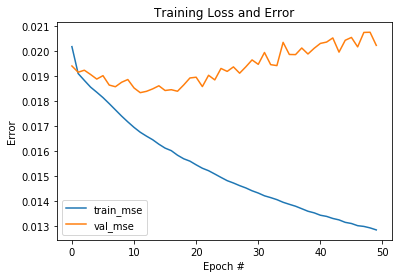

In [10]:
epoch_num = pd.np.arange(0, 50)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Lung Cancer ANN.png')

From the Training Graph, it is evident that the training and validation loss start diverging near the 20th epoch. Hence, 20 is selcted as the cutoff for nmber of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differnet splits of the same dataset.

In [11]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=20, batch_size=256, verbose=1)

kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/20
561928/561928 [==============================] - 63s 112us/step - loss: 0.0200 - mean_squared_error: 0.0200 - rmse: 0.1408 - r_sq: 0.4440
Epoch 2/20
561928/561928 [==============================] - 52s 93us/step - loss: 0.0190 - mean_squared_error: 0.0190 - rmse: 0.1372 - r_sq: 0.4727
Epoch 3/20
561928/561928 [==============================] - 52s 93us/step - loss: 0.0187 - mean_squared_error: 0.0187 - rmse: 0.1362 - r_sq: 0.48070s - loss: 0.0187 - mean_squared_error: 0.0187 - rmse: 0.1
Epoch 4/20
561928/561928 [==============================] - 53s 94us/step - loss: 0.0184 - mean_squared_error: 0.0184 - rmse: 0.1353 - r_sq: 0.4866: 14s - lo - ETA: 7s - loss: 0.0185 - mean_squared_error: 0.0185 - ETA: 1s - loss: 0.0184 - mean_squared_error: 0.
Epoch 5/20
561928/561928 [==============================] - 52s 93us/step - loss: 0.0182 - mean_squared_error: 0.0182 - rmse: 0.1346 - r_sq: 0.4920
Epoch 6/20
561928/561928 [==============================] - 53s 94us/step - loss: 0.018

561929/561929 [==============================] - 53s 95us/step - loss: 0.0166 - mean_squared_error: 0.0166 - rmse: 0.1283 - r_sq: 0.51152s - loss: 0.0165  - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166 -
Epoch 9/20
561929/561929 [==============================] - 54s 96us/step - loss: 0.0163 - mean_squared_error: 0.0163 - rmse: 0.1273 - r_sq: 0.5180
Epoch 10/20
561929/561929 [==============================] - 53s 95us/step - loss: 0.0161 - mean_squared_error: 0.0161 - rmse: 0.1264 - r_sq: 0.5247
Epoch 11/20
561929/561929 [==============================] - 55s 97us/step - loss: 0.0160 - mean_squared_error: 0.0160 - rmse: 0.1259 - r_sq: 0.5290
Epoch 12/20
561929/561929 [==============================] - 38s 68us/step - loss: 0.0158 - mean_squared_error: 0.0158 - rmse: 0.1252 - r_sq: 0.5337
Epoch 13/20
561929/561929 [==============================] - 31s 55us/step - loss: 0.0156 - mean_squared_error: 0.0156 - rmse: 0.1245 - r_sq: 0.5386
Epoch 14/20
561929/561929 [==================

C:\Users\dshre\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238953). Check your callbacks.
  % delta_t_median)


561929/561929 [==============================] - 94s 167us/step - loss: 0.0206 - mean_squared_error: 0.0206 - rmse: 0.1429 - r_sq: 0.4493
Epoch 2/20
561929/561929 [==============================] - 28s 49us/step - loss: 0.0195 - mean_squared_error: 0.0195 - rmse: 0.1390 - r_sq: 0.4796
Epoch 3/20
561929/561929 [==============================] - 28s 49us/step - loss: 0.0192 - mean_squared_error: 0.0192 - rmse: 0.1379 - r_sq: 0.4879
Epoch 4/20
561929/561929 [==============================] - 28s 50us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1371 - r_sq: 0.4930
Epoch 5/20
561929/561929 [==============================] - 28s 49us/step - loss: 0.0187 - mean_squared_error: 0.0187 - rmse: 0.1363 - r_sq: 0.4985
Epoch 6/20
561929/561929 [==============================] - 28s 50us/step - loss: 0.0185 - mean_squared_error: 0.0185 - rmse: 0.1355 - r_sq: 0.5050: 25s - loss: 0.0185 - mean_squared_error: 0.0185 - rmse: 0.135 - ETA: 24s - loss: 0.0185 - mean_squared_error: 0.0185 - rm

Finding the mean and standard deviation of the Mean Squared Error form Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [12]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.018877 (0.002359) MSE
[-0.0190402  -0.01817861 -0.02307726 -0.01826263 -0.01582718]


Refitting the dataset without overfitting over large number of epochs here.

In [13]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=20, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 561928 samples, validate on 140483 samples
Epoch 1/20
561928/561928 [==============================] - 166s 295us/step - loss: 0.0202 - mean_squared_error: 0.0202 - rmse: 0.1415 - r_sq: 0.4449 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_rmse: 0.1392 - val_r_sq: 0.4678
Epoch 2/20
561928/561928 [==============================] - 32s 56us/step - loss: 0.0191 - mean_squared_error: 0.0191 - rmse: 0.1377 - r_sq: 0.4753 - val_loss: 0.0192 - val_mean_squared_error: 0.0192 - val_rmse: 0.1382 - val_r_sq: 0.4738
Epoch 3/20
561928/561928 [==============================] - 32s 58us/step - loss: 0.0188 - mean_squared_error: 0.0188 - rmse: 0.1366 - r_sq: 0.4834 - val_loss: 0.0189 - val_mean_squared_error: 0.0189 - val_rmse: 0.1371 - val_r_sq: 0.4831
Epoch 4/20
561928/561928 [==============================] - 33s 58us/step - loss: 0.0186 - mean_squared_error: 0.0186 - rmse: 0.1359 - r_sq: 0.4891 - val_loss: 0.0189 - val_mean_squared_error: 0.0189 - val_rmse: 0.1369 - val_r_sq: 0

Performance on Test Set

In [14]:
test_pred=pd.DataFrame(estimators.predict(test_data),index=test_data.index,columns=['Pred'])
print('Test Set Performance')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

140483/140483 [==============================] - 10s 72us/step
Test Set Performance
MSE= 0.018607867392184483
RMSE= 0.13641065717965178
R Square= 0.49675235005351936


Understanding the Performance across different classes.

In [15]:
compare_test_data=pd.concat([test_target,test_pred],axis=1)
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=6months' if (row['Months Unscaled']<=6) 
    else ('0.5-2yrs'  if (row['Months Unscaled']<=24) else '>2yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

                MSE      RMSE  Support Count
>2yrs      0.048860  0.221044          36988
<=6months  0.005923  0.076962          60807
0.5-2yrs   0.010464  0.102292          42688


Plot of MSE vs the Number of Months Survived.

<Figure size 432x288 with 0 Axes>

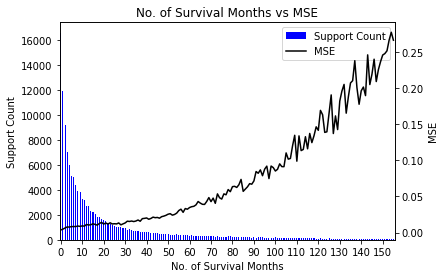

In [16]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Lung Cancer ANN MSE.png')

Plot of RMSE vs the Number of Months Survived.

<Figure size 432x288 with 0 Axes>

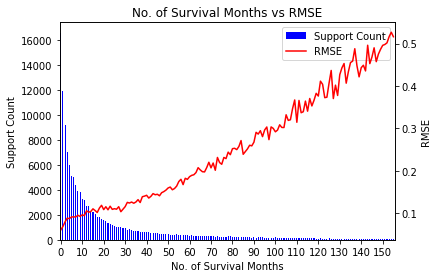

In [17]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Lung Cancer ANN RMSE.png')

## RNN Model

For both the RNN and CNN models, we need the input to be 3-dimensional including the timesteps. Therefore, reshaping the 2-D array into 3-D space.

In [18]:
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()

data_scaled=scaler1.fit_transform(data)
target_scaled=scaler2.fit_transform(target)

data_scaled=data_scaled.reshape(data_scaled.shape[0],1,data_scaled.shape[1])

A function to define the structure of the RNN with 3 hidden layers with [100,50,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem. 20% Dropout layers are present after every hidden to prevent overfitting of the model.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [19]:
def build_model_rnn():
    model=Sequential()
    
    model.add(LSTM(100, input_shape=data_scaled.shape[1:], return_sequences=True,activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True,activation='relu'))
    model.add(LSTM(20, return_sequences=False,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [20]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=50, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 561928 samples, validate on 140483 samples
Epoch 1/50
561928/561928 [==============================] - 88s 157us/step - loss: 0.0214 - mean_squared_error: 0.0214 - rmse: 0.1453 - r_sq: 0.4141 - val_loss: 0.0200 - val_mean_squared_error: 0.0200 - val_rmse: 0.1410 - val_r_sq: 0.4546
Epoch 2/50
561928/561928 [==============================] - 53s 95us/step - loss: 0.0199 - mean_squared_error: 0.0199 - rmse: 0.1405 - r_sq: 0.4543 - val_loss: 0.0194 - val_mean_squared_error: 0.0194 - val_rmse: 0.1389 - val_r_sq: 0.4695
Epoch 3/50
561928/561928 [==============================] - 55s 97us/step - loss: 0.0196 - mean_squared_error: 0.0196 - rmse: 0.1394 - r_sq: 0.4629 - val_loss: 0.0191 - val_mean_squared_error: 0.0191 - val_rmse: 0.1378 - val_r_sq: 0.4776
Epoch 4/50
561928/561928 [==============================] - 55s 98us/step - loss: 0.0193 - mean_squared_error: 0.0193 

561928/561928 [==============================] - 57s 102us/step - loss: 0.0166 - mean_squared_error: 0.0166 - rmse: 0.1284 - r_sq: 0.5422 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_rmse: 0.1341 - val_r_sq: 0.5049
Epoch 34/50
561928/561928 [==============================] - 75s 134us/step - loss: 0.0165 - mean_squared_error: 0.0165 - rmse: 0.1280 - r_sq: 0.5457 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_rmse: 0.1340 - val_r_sq: 0.5050
Epoch 35/50
561928/561928 [==============================] - 90s 159us/step - loss: 0.0165 - mean_squared_error: 0.0165 - rmse: 0.1279 - r_sq: 0.5462 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_rmse: 0.1342 - val_r_sq: 0.5039
Epoch 36/50
561928/561928 [==============================] - 97s 173us/step - loss: 0.0164 - mean_squared_error: 0.0164 - rmse: 0.1278 - r_sq: 0.5469 - val_loss: 0.0183 - val_mean_squared_error: 0.0183 - val_rmse: 0.1349 - val_r_sq: 0.4985
Epoch 37/50
561928/561928 [=========================

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


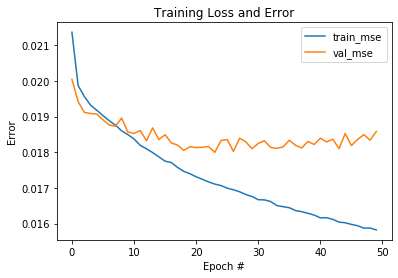

In [21]:
epoch_num = pd.np.arange(0, 50)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Lung Cancer RNN.png')

From the Training Graph, it is evident that the validation loss stabilizes near the 25th epoch while the trianing loss keeps decreasing.Hence, 25 is selcted as the cutoff for number of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differnet splits of the same dataset.

In [22]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=25, batch_size=256, verbose=1)

#pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/25
561928/561928 [==============================] - 116s 207us/step - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1449 - r_sq: 0.4103
Epoch 2/25
561928/561928 [==============================] - 53s 94us/step - loss: 0.0197 - mean_squared_error: 0.0197 - rmse: 0.1398 - r_sq: 0.4527
Epoch 3/25
561928/561928 [==============================] - 54s 96us/step - loss: 0.0194 - mean_squared_error: 0.0194 - rmse: 0.1389 - r_sq: 0.4605
Epoch 4/25
561928/561928 [==============================] - 53s 94us/step - loss: 0.0192 - mean_squared_error: 0.0192 - rmse: 0.1381 - r_sq: 0.4654
Epoch 5/25
561928/561928 [==============================] - 52s 93us/step - loss: 0.0191 - mean_squared_error: 0.0191 - rmse: 0.1375 - r_sq: 0.4704
Epoch 6/25
561928/561928 [==============================] - 55s 97us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1371 - r_sq: 0.47435s - loss: 0
Epoch 7/25
561928/561928 [==============================] - 52s 93us/step - loss: 0.0188 - mean_sq

561929/561929 [==============================] - 66s 117us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1371 - r_sq: 0.4434
Epoch 3/25
561929/561929 [==============================] - 63s 111us/step - loss: 0.0186 - mean_squared_error: 0.0186 - rmse: 0.1360 - r_sq: 0.4516
Epoch 4/25
561929/561929 [==============================] - 61s 109us/step - loss: 0.0184 - mean_squared_error: 0.0184 - rmse: 0.1353 - r_sq: 0.4573
Epoch 5/25
561929/561929 [==============================] - 60s 107us/step - loss: 0.0183 - mean_squared_error: 0.0183 - rmse: 0.1347 - r_sq: 0.4614
Epoch 6/25
561929/561929 [==============================] - 60s 107us/step - loss: 0.0182 - mean_squared_error: 0.0182 - rmse: 0.1343 - r_sq: 0.4651
Epoch 7/25
561929/561929 [==============================] - 62s 110us/step - loss: 0.0180 - mean_squared_error: 0.0180 - rmse: 0.1339 - r_sq: 0.4685
Epoch 8/25
561929/561929 [==============================] - 69s 123us/step - loss: 0.0179 - mean_squared_error: 0.017

561929/561929 [==============================] - 74s 131us/step - loss: 0.0204 - mean_squared_error: 0.0204 - rmse: 0.1422 - r_sq: 0.4674
Epoch 4/25
561929/561929 [==============================] - 75s 134us/step - loss: 0.0201 - mean_squared_error: 0.0201 - rmse: 0.1415 - r_sq: 0.4725
Epoch 5/25
561929/561929 [==============================] - 84s 149us/step - loss: 0.0200 - mean_squared_error: 0.0200 - rmse: 0.1409 - r_sq: 0.4768
Epoch 6/25
561929/561929 [==============================] - 76s 135us/step - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.1403 - r_sq: 0.4814
Epoch 7/25
561929/561929 [==============================] - 77s 137us/step - loss: 0.0197 - mean_squared_error: 0.0197 - rmse: 0.1399 - r_sq: 0.4840
Epoch 8/25
561929/561929 [==============================] - 76s 136us/step - loss: 0.0196 - mean_squared_error: 0.0196 - rmse: 0.1394 - r_sq: 0.4879
Epoch 9/25
561929/561929 [==============================] - 76s 136us/step - loss: 0.0194 - mean_squared_error: 0.019

Finding the mean and standard deviation of the Mean Squared Error form Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [23]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.018542 (0.002405) MSE
[-0.01905139 -0.01767596 -0.02271301 -0.01790777 -0.0153621 ]


Refitting the model without overfitting the model over large number of epochs

In [24]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=25, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 561928 samples, validate on 140483 samples
Epoch 1/25
561928/561928 [==============================] - 147s 261us/step - loss: 0.0214 - mean_squared_error: 0.0214 - rmse: 0.1456 - r_sq: 0.4113 - val_loss: 0.0197 - val_mean_squared_error: 0.0197 - val_rmse: 0.1397 - val_r_sq: 0.4632
Epoch 2/25
561928/561928 [==============================] - 80s 142us/step - loss: 0.0200 - mean_squared_error: 0.0200 - rmse: 0.1409 - r_sq: 0.4509 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_rmse: 0.1390 - val_r_sq: 0.4695
Epoch 3/25
561928/561928 [==============================] - 80s 142us/step - loss: 0.0197 - mean_squared_error: 0.0197 - rmse: 0.1398 - r_sq: 0.4598 - val_loss: 0.0192 - val_mean_squared_error: 0.0192 - val_rmse: 0.1381 - val_r_sq: 0.4764
Epoch 4/25
561928/561928 [==============================] - 80s 142us/step - loss: 0.0195 - mean_squared_error: 0.0195 - rmse: 0.1390 - r_sq: 0.4654 - val_loss: 0.0191 - val_mean_squared_error: 0.0191 - val_rmse: 0.1378 - val_r_sq

Performance on the Test Set

In [25]:
test_pred=estimators.predict(test_data)
print('\nTest Set Performance\n')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

140483/140483 [==============================] - 10s 74us/step

Test Set Performance

MSE= 0.018219427424232708
RMSE= 0.1349793592525639
R Square= 0.5072576646549724


Understanding the Performance across different classes.

In [26]:
compare_test_data=pd.DataFrame({'SRV_TIME_MON':test_target[:,0],'Pred':test_pred})
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=6months' if (row['Months Unscaled']<=6) 
    else ('0.5-2yrs'  if (row['Months Unscaled']<=24) else '>2yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

                MSE      RMSE  Support Count
>2yrs      0.049443  0.222359          36988
<=6months  0.005661  0.075239          60807
0.5-2yrs   0.009054  0.095151          42688


Plot of MSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

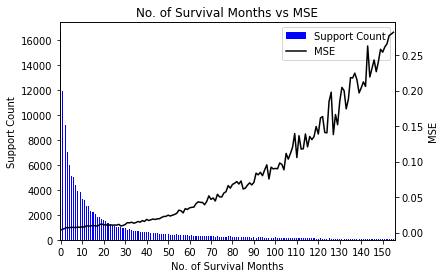

In [27]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Lung Cancer RNN MSE.png')

Plot of RMSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

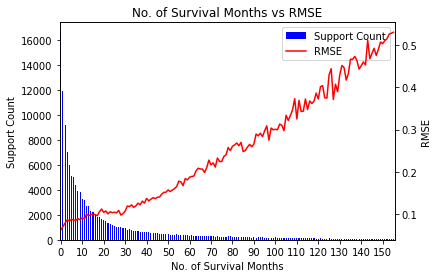

In [28]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Lung Cancer RNN RMSE.png')

## CNN Model 

A function to define the structure of the CNN with 3 hidden layers with [100,50,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem. Conv1D layers are used as hidden layers and flattened just before output layer.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [29]:
def build_model_cnn():
    model=Sequential()
    
    model.add(Conv1D(100, 1, input_shape=train_data.shape[1:], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(50, 1, activation='relu')) 
    model.add(Conv1D(20, 1, activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [30]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=50, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 561928 samples, validate on 140483 samples
Epoch 1/50
561928/561928 [==============================] - 69s 122us/step - loss: 0.0211 - mean_squared_error: 0.0211 - rmse: 0.1447 - r_sq: 0.4203 - val_loss: 0.0197 - val_mean_squared_error: 0.0197 - val_rmse: 0.1397 - val_r_sq: 0.4635
Epoch 2/50
561928/561928 [==============================] - 26s 47us/step - loss: 0.0200 - mean_squared_error: 0.0200 - rmse: 0.1410 - r_sq: 0.4500 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_rmse: 0.1392 - val_r_sq: 0.4682
Epoch 3/50
561928/561928 [==============================] - 27s 48us/step - loss: 0.0197 - mean_squared_error: 0.0197 - rmse: 0.1399 - r_sq: 0.4578 - val_loss: 0.0193 - val_mean_squared_error: 0.0193 - val_rmse: 0.1383 - val_r_sq: 0.4740
Epoch 4/50
561928/561928 [==============================] - 28s 50us/step - loss: 0.0195 - mean_squared_error: 0.0195 - rmse: 0.1392 - r_sq: 0.4636 - val_loss: 0.0194 - val_mean_squared_error: 0.0194 - val_rmse: 0.1387 - val_r_sq: 0.

561928/561928 [==============================] - 26s 47us/step - loss: 0.0173 - mean_squared_error: 0.0173 - rmse: 0.1312 - r_sq: 0.5226 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_rmse: 0.1340 - val_r_sq: 0.5059
Epoch 36/50
561928/561928 [==============================] - 26s 45us/step - loss: 0.0174 - mean_squared_error: 0.0174 - rmse: 0.1314 - r_sq: 0.5212 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_rmse: 0.1338 - val_r_sq: 0.5073
Epoch 37/50
561928/561928 [==============================] - 29s 51us/step - loss: 0.0173 - mean_squared_error: 0.0173 - rmse: 0.1311 - r_sq: 0.5234 - val_loss: 0.0182 - val_mean_squared_error: 0.0182 - val_rmse: 0.1343 - val_r_sq: 0.5040
Epoch 38/50
561928/561928 [==============================] - 31s 55us/step - loss: 0.0173 - mean_squared_error: 0.0173 - rmse: 0.1309 - r_sq: 0.5244 - val_loss: 0.0184 - val_mean_squared_error: 0.0184 - val_rmse: 0.1351 - val_r_sq: 0.4962
Epoch 39/50
561928/561928 [=============================

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


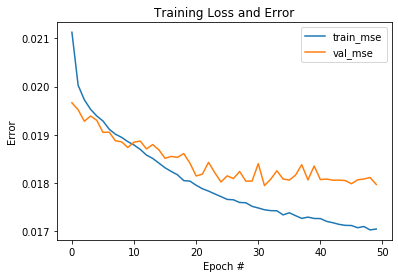

In [31]:
epoch_num = pd.np.arange(0, 50)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Lung Cancer CNN.png')

From the Training Graph, it is evident that the validation loss stabilizes near the 25th epoch while the trianing loss decreases.Hence, 25 is selcted as the cutoff for number of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differenet splits of the same dataset.

In [32]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=25, batch_size=256, verbose=1)

#pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/25
561928/561928 [==============================] - 57s 101us/step - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1450 - r_sq: 0.4105
Epoch 2/25
561928/561928 [==============================] - 31s 55us/step - loss: 0.0199 - mean_squared_error: 0.0199 - rmse: 0.1406 - r_sq: 0.44700s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 3/25
561928/561928 [==============================] - 30s 53us/step - loss: 0.0196 - mean_squared_error: 0.0196 - rmse: 0.1396 - r_sq: 0.4547
Epoch 4/25
561928/561928 [==============================] - 30s 53us/step - loss: 0.0194 - mean_squared_error: 0.0194 - rmse: 0.1388 - r_sq: 0.46012s - loss: 0.0194 - mean_squared_error: 0.0194 - rmse: 0.1389 - r_ - ETA: 2s -
Epoch 5/25
561928/561928 [==============================] - 26s 47us/step - loss: 0.0193 - mean_squared_error: 0.0193 - rmse: 0.1385 - r_sq: 0.4628
Epoch 6/25
561928/561928 [==============================] - 28s 51us/step - loss: 0.0192 - mean_squared_error: 0.0192 - rmse: 0.1381 - 

561929/561929 [==============================] - 28s 49us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1368 - r_sq: 0.4446
Epoch 3/25
561929/561929 [==============================] - 28s 50us/step - loss: 0.0186 - mean_squared_error: 0.0186 - rmse: 0.1358 - r_sq: 0.45331s - loss: 0.0186 - mean_squared_error
Epoch 4/25
561929/561929 [==============================] - 28s 50us/step - loss: 0.0184 - mean_squared_error: 0.0184 - rmse: 0.1351 - r_sq: 0.4587
Epoch 5/25
561929/561929 [==============================] - 29s 52us/step - loss: 0.0183 - mean_squared_error: 0.0183 - rmse: 0.1347 - r_sq: 0.4616
Epoch 6/25
561929/561929 [==============================] - 26s 47us/step - loss: 0.0182 - mean_squared_error: 0.0182 - rmse: 0.1343 - r_sq: 0.4648
Epoch 7/25
561929/561929 [==============================] - 28s 49us/step - loss: 0.0181 - mean_squared_error: 0.0181 - rmse: 0.1339 - r_sq: 0.46821s - loss: 0.0181 - mean_squared_e
Epoch 8/25
561929/561929 [=========================

561929/561929 [==============================] - 28s 50us/step - loss: 0.0209 - mean_squared_error: 0.0209 - rmse: 0.1442 - r_sq: 0.4527
Epoch 3/25
561929/561929 [==============================] - 28s 50us/step - loss: 0.0207 - mean_squared_error: 0.0207 - rmse: 0.1433 - r_sq: 0.4589
Epoch 4/25
561929/561929 [==============================] - 29s 52us/step - loss: 0.0204 - mean_squared_error: 0.0204 - rmse: 0.1424 - r_sq: 0.4653
Epoch 5/25
561929/561929 [==============================] - 27s 49us/step - loss: 0.0203 - mean_squared_error: 0.0203 - rmse: 0.1419 - r_sq: 0.4704
Epoch 6/25
561929/561929 [==============================] - 28s 49us/step - loss: 0.0201 - mean_squared_error: 0.0201 - rmse: 0.1414 - r_sq: 0.4730
Epoch 7/25
561929/561929 [==============================] - 28s 49us/step - loss: 0.0200 - mean_squared_error: 0.0200 - rmse: 0.1409 - r_sq: 0.47711s - loss: 0.0200 - mean_squared_e
Epoch 8/25
561929/561929 [==============================] - 29s 51us/step - loss: 0.0199 

Finding the mean and standard deviation of the Mean Squared Error from Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [33]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.018434 (0.002230) MSE
[-0.01883809 -0.01799695 -0.02229943 -0.01757396 -0.01546327]


Refitting the model witout overfitting the model over large number of epochs

In [34]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=25, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 561928 samples, validate on 140483 samples
Epoch 1/25
561928/561928 [==============================] - 41s 73us/step - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1451 - r_sq: 0.4170 - val_loss: 0.0197 - val_mean_squared_error: 0.0197 - val_rmse: 0.1399 - val_r_sq: 0.4621
Epoch 2/25
561928/561928 [==============================] - 31s 55us/step - loss: 0.0201 - mean_squared_error: 0.0201 - rmse: 0.1411 - r_sq: 0.4493 - val_loss: 0.0196 - val_mean_squared_error: 0.0196 - val_rmse: 0.1395 - val_r_sq: 0.4655
Epoch 3/25
561928/561928 [==============================] - 29s 52us/step - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.1401 - r_sq: 0.4564 - val_loss: 0.0193 - val_mean_squared_error: 0.0193 - val_rmse: 0.1384 - val_r_sq: 0.4726
Epoch 4/25
561928/561928 [==============================] - 30s 54us/step - loss: 0.0196 - mean_squared_error: 0.0196 - rmse: 0.1394 - r_sq: 0.4624 - val_loss: 0.0191 - val_mean_squared_error: 0.0191 - val_rmse: 0.1378 - val_r_sq: 0.4

Performance on the Test Set

In [35]:
test_pred=estimators.predict(test_data)
print('\nTest Set Performance\n')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

140483/140483 [==============================] - 4s 28us/step

Test Set Performance

MSE= 0.018186115716680818
RMSE= 0.13485590723687568
R Square= 0.5081585759839209


Understanding performance across different classes.

In [36]:
compare_test_data=pd.DataFrame({'SRV_TIME_MON':test_target[:,0],'Pred':test_pred})
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=6months' if (row['Months Unscaled']<=6) 
    else ('0.5-2yrs'  if (row['Months Unscaled']<=24) else '>2yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

                MSE      RMSE  Support Count
>2yrs      0.050329  0.224342          36988
<=6months  0.005652  0.075181          60807
0.5-2yrs   0.008189  0.090492          42688


Plot of MSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

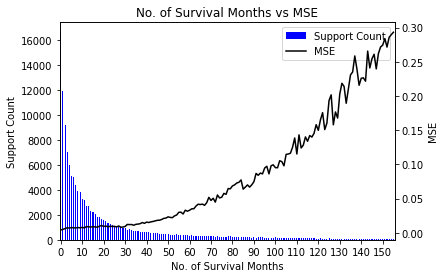

In [37]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Lung Cancer CNN MSE.png')

Plot of RMSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

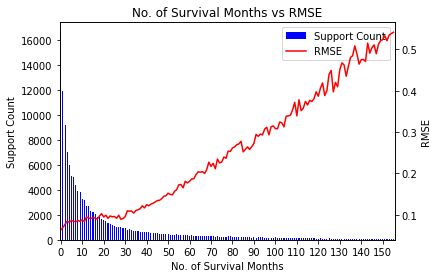

In [38]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Lung Cancer CNN RMSE.png')